Step 09: the concatenated EEG features without artifacts are standarized with 0 mean and 1 standard deviation. The standarized data is further dimensionally reduced by Principal Component Analysis (PCA) and Elbow method is applied to find out the optimal principal components.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
no_columns = 34 # numbers of columns

file_path = './features_csv_feat11/'
data = pd.read_csv('EEG_features.csv')
file_name = data['fname']

In [4]:
# add all channels and subjects of EEG data 
df_concat = np.empty((0, 34))

for fname in file_name:
    df_feat = pd.read_csv(file_path+fname)
    df_concat = np.concatenate((df_concat, df_feat), axis=0)
    
print('Shape of concatenated data frame: {}' .format(df_concat.shape))

Shape of concatenated data frame: (142020, 34)


In [5]:
columns = pd.read_csv(file_path+fname).columns # extracting columns

df = pd.DataFrame(data = df_concat, columns=columns) # creating data frame of concatenated data

In [6]:
df_ex = df[df['flag'] == 0] # excluding flag == 1 values or artifacts
df_feat = df_ex.drop(['flag', 'alpha_mean', 'theta_mean', 'delta_mean'], axis=1) # droping irrelevant features

print('Shape of data frame after droping some columns: {}' .format(df_feat.shape))

Shape of data frame after droping some columns: (141020, 30)


In [7]:
# data standardization with 0 mean and 1 standard deviation  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
scaler = StandardScaler()
scaler.fit(df_feat)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
X = scaler.transform(df_feat)
print('Shape of data after standardization: {}' .format(X.shape))

Shape of data after standardization: (141020, 30)


In [9]:
# applying PCA, refernced link https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
X_pca = PCA().fit(X)


0.25285372943956136

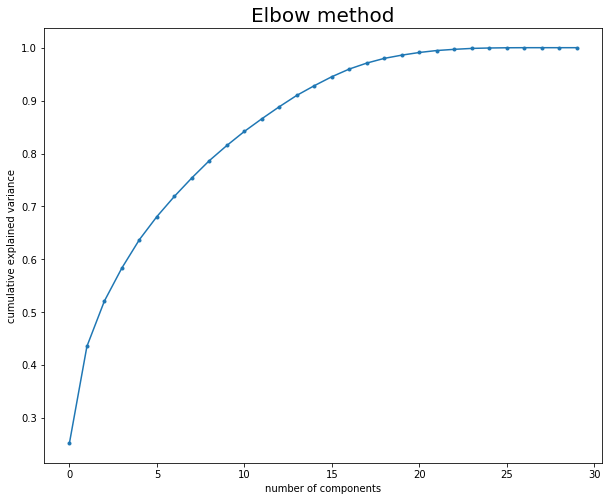

In [10]:
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(X_pca.explained_variance_ratio_), '.-')
plt.title('Elbow method', fontsize=20)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
np.max(X_pca.explained_variance_ratio_)

In [11]:
X_pca = PCA().fit(np.transpose(X)) # transposing the data

Text(0, 0.5, 'cumulative explained variance')

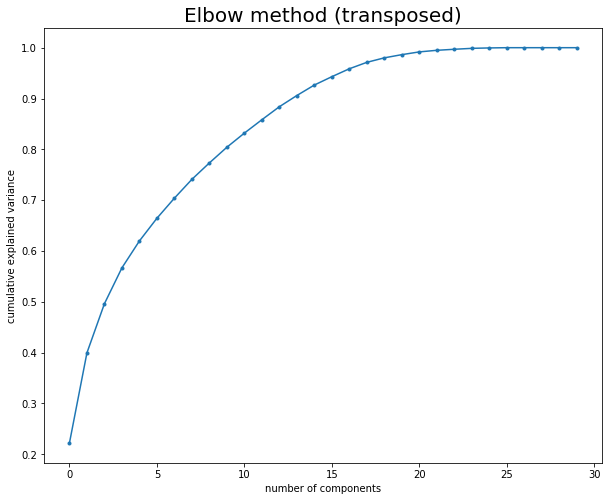

In [12]:
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(X_pca.explained_variance_ratio_), '.-')
plt.title('Elbow method (transposed)', fontsize=20)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'explained variance')

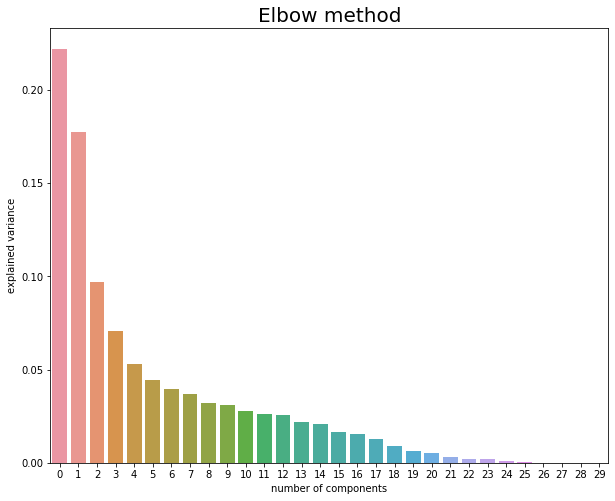

In [13]:

plt.figure(figsize=(10,8))
sns.barplot(x=np.arange(30), y=X_pca.explained_variance_ratio_)
plt.title('Elbow method', fontsize=20)
plt.xlabel('number of components')
plt.ylabel('explained variance')

Shape of 15 components of PCA: (141020, 15)


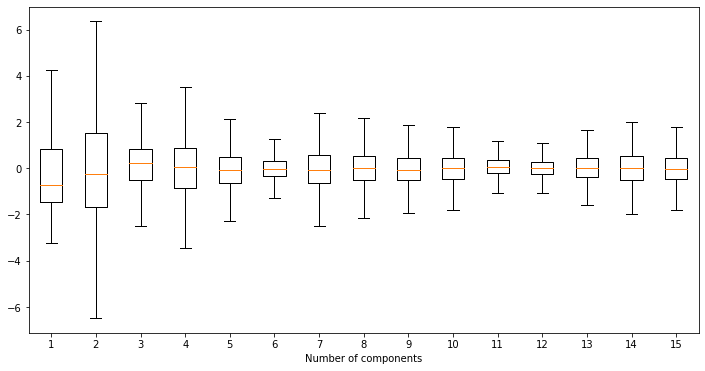

In [14]:
# applying PCA with 15 components
pca = PCA(n_components=15)
pca.fit(X)
X_pca = pca.transform(X)
print('Shape of 15 components of PCA: {}' .format(X_pca.shape))

# boxplot of 15 components
plt.figure(figsize=(12,6))
plt.boxplot(X_pca, showfliers=False)
plt.xlabel('Number of components')
plt.show()

# Refernce link of standardization and PCA

https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0   
https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/     
https://scikit-learn.org/stable/modules/preprocessing.html     
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60